# A1. 複合処理 (offline用)
ステージを動かし、動かしてからの時間経過ごとのずれ量を表示する  
1. ステージを10um動かし、初期位置に戻す。
2. 指定したループ回数増の撮影を行う。
3. 一枚目の画像と、その後画像の比較を行い、ずれ量をグラフとして表示する

In [1]:
%matplotlib inline
import PyJEM
import time
from PyJEM.offline import detector
from PyJEM.offline import TEM3
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

0 : camera
1 : STEM Image


In [2]:
_detector = detector.Detector("camera")

camera is Correct!


In [3]:
_detector.snapshot("jpg", save=True, filename="test")

array([[ 77,  88,  95, ...,   0,   0,   0],
       [160, 156,  83, ...,   0,   0,   0],
       [157, 137, 143, ...,   0,   0,   0],
       ..., 
       [145, 138, 153, ..., 255, 255, 255],
       [ 94,  82,  37, ..., 255, 255, 255],
       [ 91, 141, 122, ..., 255, 255, 255]], dtype=uint8)

input:10
detectorName: camera
extention: jpg
camera is Correct!
Start Python Script.
No.1
X = 0.0, Y = -1.1368683772161603e-13
Distance = 1.1368683772161603e-13
No.2
X = 0.0, Y = -1.1368683772161603e-13
Distance = 1.1368683772161603e-13
No.3
X = 0.0, Y = -1.1368683772161603e-13
Distance = 1.1368683772161603e-13
No.4
X = 0.0, Y = -1.1368683772161603e-13
Distance = 1.1368683772161603e-13
No.5
X = 0.0, Y = -1.1368683772161603e-13
Distance = 1.1368683772161603e-13
No.6
X = 0.0, Y = -1.1368683772161603e-13
Distance = 1.1368683772161603e-13
No.7
X = 0.0, Y = -1.1368683772161603e-13
Distance = 1.1368683772161603e-13
No.8
X = 0.0, Y = -1.1368683772161603e-13
Distance = 1.1368683772161603e-13
No.9
X = 0.0, Y = -1.1368683772161603e-13
Distance = 1.1368683772161603e-13
No.10
X = 0.0, Y = -1.1368683772161603e-13
Distance = 1.1368683772161603e-13
= End =
Time = 1.7679926167919007 sec
Drift = 6.430277855340014e-14 (pixels / sec)


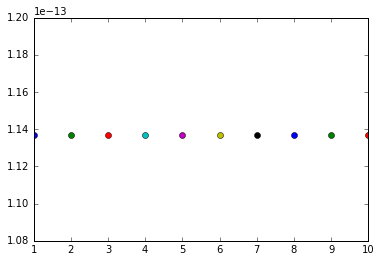

In [6]:
num = int(input("input:"))
detectorName = input("detectorName: ")
extention = input("extention: ")

_stage = TEM3.Stage3()
_detector = detector.Detector(detectorName)

print ("Start Python Script.")

_stage.SetXRel(10000)
_stage.SetYRel(10000)

_stage.SetXRel(-10000)
_stage.SetYRel(-10000)

time.sleep(1)

st = time.clock()

for i in range(num+1):
    if ( i == 0):
        _detector.snapshot(extention, save=True, filename="test" + str(i))

    elif( i > 0):
        _detector.snapshot(extention, save=True, filename="test" + str(i))

        img1 = cv2.imread(detector.resource_path + "\\test" + str(0) + "." + extention, 0)
        img2 = cv2.imread(detector.resource_path + "\\test" + str(i) + "." + extention, 0)

        img1 = np.float32(img1)
        img2 = np.float32(img2)

        print ("No." + str(i))
        value,b = cv2.phaseCorrelate(img1,img2)
        print ("X = " + str(value[0]) + ", Y = " + str(value[1]))

        distance = math.sqrt((value[0]*value[0]) + (value[1]*value[1]))
        print ("Distance = " + str(distance))

        plt.plot(i, distance, "o")

fin = time.clock()
print ("= End =")
print ("Time = "+str(fin - st) + " sec")
print ("Drift = " + str(distance / (fin - st)) + " (pixels / sec)")
plt.show()

In [7]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi